In [1]:
#import MDAnalysis
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import GRO, TPR, PSF, XTC
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=100)
from tqdm.auto import tqdm
import pickle
from MDAnalysis.tests.datafiles import waterPSF, waterDCD
from MDAnalysis.analysis.hydrogenbonds import HydrogenBondAnalysis
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [2]:
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Startpoint/W31A_219_200us_200_0us/step6_6.tpr", "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W31A_219_200us_200_0us/step7_centered.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 114 residues in the protein


In [3]:
#Trajectory frames
u_1000 = u.trajectory[::10]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/601 [00:00<?, ?it/s]

601

In [18]:
hbonds_AB1 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 385:405 or index 881:901", #881:901 
    acceptors_sel="index 1612:1626", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [19]:
hbonds_AB1.run(
    start=None,
    stop=None,
    step=10,
    verbose=True
)

  0%|          | 0/601 [00:00<?, ?it/s]

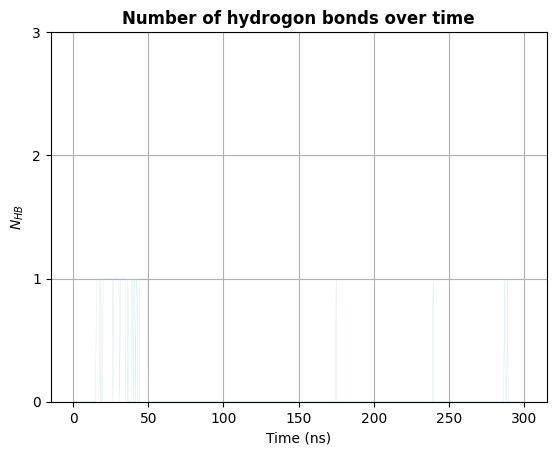

In [20]:
ax = plt.plot(hbonds_AB1.times/1000, hbonds_AB1.count_by_time(), lw=0.15, color='lightblue')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 4, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 3])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

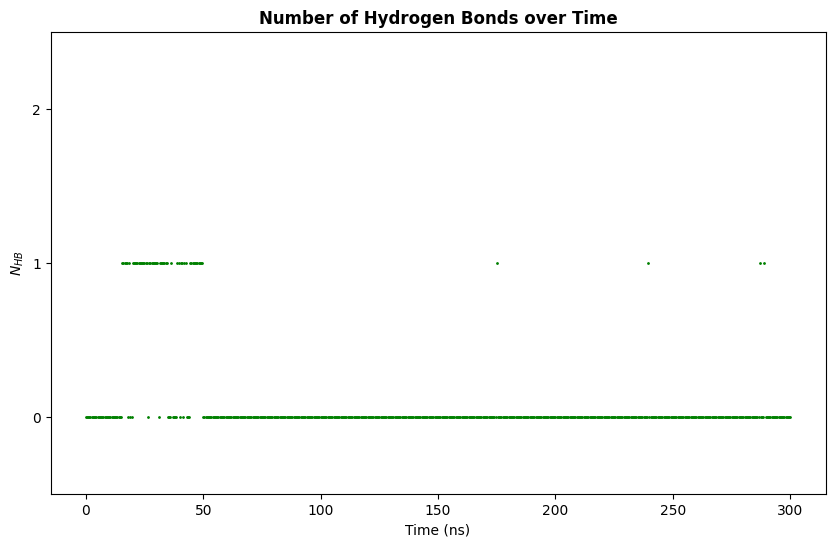

In [21]:
# Replacing the plot with scatter
plt.figure(figsize=(10, 6))
plt.scatter(hbonds_AB1.times / 1000, hbonds_AB1.count_by_time(), color='green', s=1, label='Hydrogen bonds')

# Adding the title, labels, and other plot customizations
plt.title("Number of Hydrogen Bonds over Time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 4, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([-0.5, 2.5])  # Adjust the y-axis limits to fit your data

# plt.grid(True)  # Adding grid lines for better visualization

# Show the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


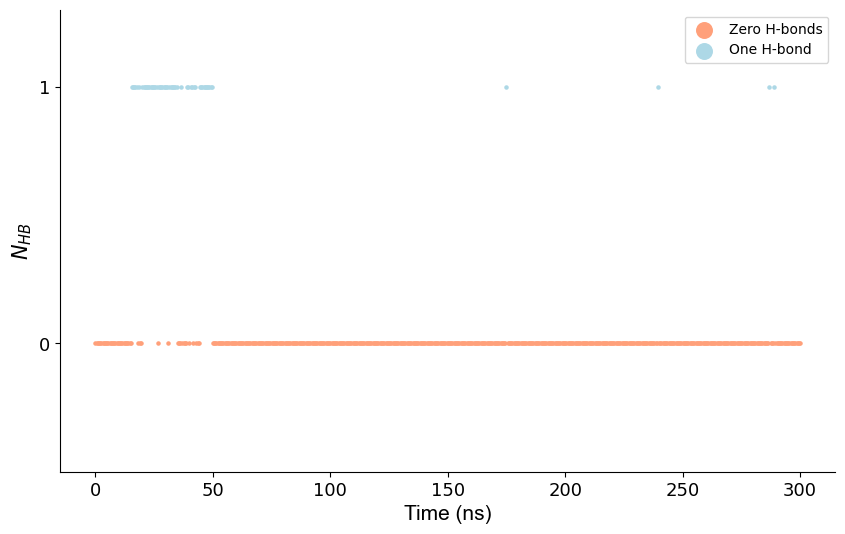

In [22]:
# Prepare data
times = hbonds_AB1.times / 1000  # Convert to nanoseconds
counts = hbonds_AB1.count_by_time()  # Hydrogen bond count per frame

# Create the figure
plt.figure(figsize=(10, 6))

# Scatter plots for each hydrogen bond count
plt.scatter(times[counts == 0], counts[counts == 0], color='lightsalmon', s=5, label='Zero H-bonds')
plt.scatter(times[counts == 1], counts[counts == 1], color='lightblue', s=5, label='One H-bond')
# plt.scatter(times[counts == 2], counts[counts == 2], color='lightseagreen', s=5, label='Two H-bonds')

# Plot customization
# plt.title("Number of Hydrogen Bonds over Time", weight="bold")
plt.xlabel("Time (ns)", fontsize=15, fontname='Arial')
plt.ylabel(r"$N_{HB}$", fontsize=15, fontname='Arial')


plt.legend(loc='best')
            
ax=plt.gca() ##get caurrent axis           
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines
ax.tick_params(axis='x', labelsize=13)  # Increase x-axis label size
ax.tick_params(axis='y', labelsize=13)  # Increase y-axis label size


# Y-axis ticks and limits
plt.yticks(np.arange(0, 3, 1))
plt.ylim([-0.5, 1.3])

# Add legend
plt.legend(markerscale=5)  # markerscale makes the legend markers more visible

# Optional grid
# plt.grid(True)
#Saving the plot as an image file
plt.savefig("/Users/k20098771/Data/Figures/W31Z_219_hydrogen_number.eps", dpi=800, format='eps',bbox_inches="tight")
# Show the plot
plt.show()

In [23]:
hbonds_AB1.count_by_ids()

array([[ 894,  895, 1624,   28],
       [ 894,  895, 1623,   24],
       [ 398,  399, 1626,    2],
       [ 398,  399, 1624,    2]])

In [24]:
# Your 2D NumPy array
data = hbonds_AB1.count_by_ids()
# Sort the rows based on the second column (index 1)
sorted_indices = np.argsort(data[:, 2])

# Rank the rows
ranked_data = data[sorted_indices]
# Print the ranked data
print(ranked_data)

[[ 894  895 1623   24]
 [ 894  895 1624   28]
 [ 398  399 1624    2]
 [ 398  399 1626    2]]


In [25]:
print(hbonds_AB1.results.hbonds.shape)

(56, 6)


In [26]:
import numpy as np

# Get the number of hydrogen bonds in each frame
hbonds_count = hbonds_AB1.count_by_time()

# Step 1: Determine if the frame has any hydrogen bonds (i.e., count > 0)
has_hbond = hbonds_count > 0

# Step 2: Calculate the number of frames with hydrogen bonds and without
frames_with_hbond = np.sum(has_hbond)
frames_without_hbond = len(hbonds_count) - frames_with_hbond

# Step 3: Calculate the percentages
percent_with_hbond = (frames_with_hbond / len(hbonds_count)) * 100
percent_without_hbond = (frames_without_hbond / len(hbonds_count)) * 100

# Step 4: Output the results
print(f"Percentage of frames with hydrogen bonds: {percent_with_hbond:.2f}%")
print(f"Percentage of frames without hydrogen bonds: {percent_without_hbond:.2f}%")


Percentage of frames with hydrogen bonds: 9.32%
Percentage of frames without hydrogen bonds: 90.68%


In [27]:
# import matplotlib.pyplot as plt

# # Data for the pie chart
# labels = ['With Hydrogen Bonds', 'Without Hydrogen Bonds']
# sizes = [percent_with_hbond, percent_without_hbond]
# colors = ['lightseagreen', 'lightsalmon']

# # Create the pie chart
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# # Equal aspect ratio ensures that pie chart is drawn as a circle.
# plt.axis('equal')

# # Add title
# plt.title('Percentage of Frames with and without Hydrogen Bonds', fontsize=14, weight='bold')

# # Show the plot
# plt.show()


Percentage of frames with 0 hydrogen bonds: 90.68%
Percentage of frames with 1 hydrogen bond: 9.32%
Percentage of frames with 2 or more hydrogen bonds: 0.00%


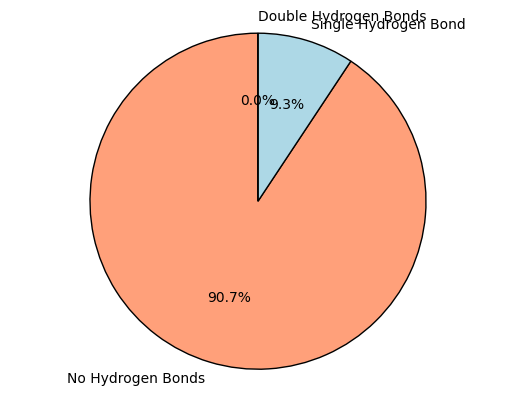

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Get the number of hydrogen bonds in each frame
hbonds_count = hbonds_AB1.count_by_time()

# Step 1: Categorize the frames into three groups based on hydrogen bond count
zero_hbond = np.sum(hbonds_count == 0)  # Frames with 0 hydrogen bonds
one_hbond = np.sum(hbonds_count == 1)   # Frames with exactly 1 hydrogen bond
two_or_more_hbond = np.sum(hbonds_count >= 2)  # Frames with 2 or more hydrogen bonds

# Step 2: Calculate the percentages for each category
total_frames = len(hbonds_count)
percent_zero_hbond = (zero_hbond / total_frames) * 100
percent_one_hbond = (one_hbond / total_frames) * 100
percent_two_or_more_hbond = (two_or_more_hbond / total_frames) * 100

# Step 3: Output the results
print(f"Percentage of frames with 0 hydrogen bonds: {percent_zero_hbond:.2f}%")
print(f"Percentage of frames with 1 hydrogen bond: {percent_one_hbond:.2f}%")
print(f"Percentage of frames with 2 or more hydrogen bonds: {percent_two_or_more_hbond:.2f}%")

# Data for the pie chart
labels = ['No Hydrogen Bonds', 'Single Hydrogen Bond', 'Double Hydrogen Bonds']
sizes = [percent_zero_hbond, percent_one_hbond, percent_two_or_more_hbond]
colors = ['lightsalmon', 'lightblue', 'lightseagreen']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Add title
# plt.title('Percentage of Frames with Different Hydrogen Bond Counts', fontsize=14, weight='bold')

# Show the plot
plt.show()


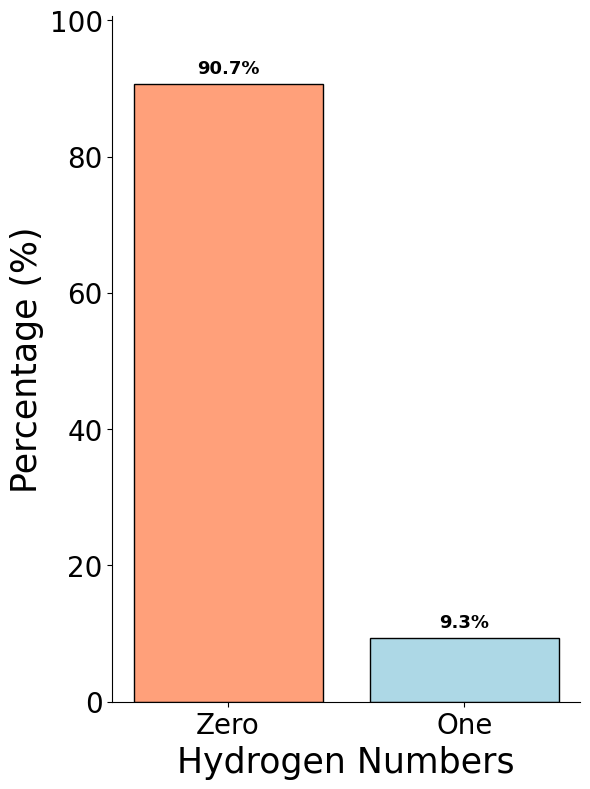

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Get the number of hydrogen bonds in each frame
hbonds_count = hbonds_AB1.count_by_time()

# Step 1: Categorize the frames
zero_hbond = np.sum(hbonds_count == 0)
one_hbond = np.sum(hbonds_count == 1)
# two_or_more_hbond = np.sum(hbonds_count >= 2)

# Step 2: Calculate percentages
total_frames = len(hbonds_count)
percent_zero_hbond = (zero_hbond / total_frames) * 100
percent_one_hbond = (one_hbond / total_frames) * 100
# percent_two_or_more_hbond = (two_or_more_hbond / total_frames) * 100

# Step 3: Bar chart data
labels = ['Zero', 'One',]
percentages = [percent_zero_hbond, percent_one_hbond]
colors = ['lightsalmon', 'lightblue']

# Create the bar chart
plt.figure(figsize=(6, 8))
bars = plt.bar(labels, percentages, color=colors, edgecolor='black')

# Annotate each bar with percentage text
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{percent:.1f}%', 
             ha='center', va='bottom', fontsize=13,fontweight='bold')

# Customize the plot
plt.ylabel('Percentage (%)', fontsize=25)
plt.xlabel('Hydrogen Numbers', fontsize=25)
plt.ylim(0, max(percentages) + 10)  # Add some headroom

ax=plt.gca() ##get caurrent axis           
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines
ax.tick_params(axis='x', labelsize=20)  # Increase x-axis label size
ax.tick_params(axis='y', labelsize=20)  # Increase y-axis label size

# Show the plot
plt.tight_layout()

#Saving the plot as an image file
plt.savefig("/Users/k20098771/Data/Figures/W31A_FL_hydrogen.eps", dpi=800, format='eps',bbox_inches="tight")
plt.show()


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Extract hydrogen bond data from results
hb_data = hbonds_AB1.results.hbonds

# Extract columns
frames = hb_data[:, 0].astype(int)
times = hbonds_AB1.times[frames] / 1000  # convert to ns
distances = hb_data[:, 4]
angles = hb_data[:, 5]

# Filter by angle ≥ 150 (i.e., hydrogen bonds by geometric definition)
mask = angles >= 150
times_hbond = times[mask]
distances_hbond = distances[mask]

# ✅ Plotting
plt.figure(figsize=(10, 5))
plt.scatter(times_hbond, distances_hbond, color='red', s=10, label='Hydrogen Bonds (angle ≥ 150°)')
plt.axhline(3.0, color='gray', linestyle='--', label='Distance Cutoff (3 Å)')

plt.xlabel("Time (ns)")
plt.ylabel("Donor-Acceptor Distance (Å)")
plt.title("Hydrogen Bonds Over Time")
plt.ylim([0, 5])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


IndexError: index 610 is out of bounds for axis 0 with size 601

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from numpy.linalg import norm

# Select atoms
hydrogens = u.select_atoms("index 1420 1421 1422")
acceptors = u.select_atoms("index 204 205 700 701")
# Get each hydrogen's bonded donor (as individual Atom objects)
donors = [h.bonded_atoms[0] for h in hydrogens]

# Sanity check
print(f"Found {len(donors)} donors and {len(hydrogens)} hydrogens")

# Store all interaction info
interaction_data = []

for ts in tqdm(u.trajectory):
    time_ps = u.trajectory.time
    for h, d in zip(hydrogens, donors):
        for a in acceptors:
            # Compute distances
            d_a_dist = norm(d.position - a.position)
            h_a_dist = norm(h.position - a.position)

            # Compute angle D-H...A
            vec_dh = h.position - d.position
            vec_ha = a.position - h.position
            cos_angle = np.dot(vec_dh, vec_ha) / (norm(vec_dh) * norm(vec_ha))
            angle = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))

            interaction_data.append({
                'time_ps': time_ps,
                'donor': d.index,
                'hydrogen': h.index,
                'acceptor': a.index,
                'distance': d_a_dist,
                'angle': angle,
                'is_hbond': (d_a_dist <= 3.0 and angle >= 150.0)
            })

# Convert to DataFrame
df = pd.DataFrame(interaction_data)

# ✅ Plot everything: all distances vs time
plt.figure(figsize=(10, 5))
plt.scatter(df['time_ps'], df['distance'], color='lightgray', s=5, label='All interactions')
plt.scatter(df[df['is_hbond']]['time_ps'], df[df['is_hbond']]['distance'],
            color='red', s=10, label='Hydrogen Bonds (angle ≥ 150°)')
plt.axhline(3.0, linestyle='--', color='gray', label='Distance Cutoff (3 Å)')

plt.xlabel("Time (ps)")
plt.ylabel("Donor-Acceptor Distance (Å)")
plt.title("All Donor–Acceptor Interactions Over Time")
plt.legend()
plt.ylim([0, 6])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Group by time
grouped = df.groupby("time_ps")

# Step 2: Check if any hbond exists in that frame
hbond_per_frame = grouped["is_hbond"].any()

# Step 3: Count total frames and those with at least one hbond
total_frames = len(hbond_per_frame)
frames_with_hbond = hbond_per_frame.sum()
frames_without_hbond = total_frames - frames_with_hbond

# Step 4: Calculate percentages
percent_with_hbond = (frames_with_hbond / total_frames) * 100
percent_without_hbond = (frames_without_hbond / total_frames) * 100

# Print results
print(f"Hydrogen bond time: {percent_with_hbond:.2f}%")
print(f"No hydrogen bond time: {percent_without_hbond:.2f}%")
